<a href="https://colab.research.google.com/github/alimehdi4236/PFG/blob/main/ALI_fifth_clustering_sassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import datetime
import time

In [ ]:
# function for a unique tuples collection
# Adopted from: https://stackoverflow.com/questions/31097247/remove-duplicate-rows-of-a-numpy-array
def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))



### The beginning

https://medium.com/thelorry-product-tech-data/the-clustering-algorithm-with-geolocation-data-d6dd07ed36a


#### Download individual file from https://s3.amazonaws.com/tripdata/index.html
The file title is 'YYYYMM-citibike-tripdata.csv.zip'
The LAST STUDENT digit from internal KTU code use for a Year definition i.e.
*   {0,1}==2017
*   {2,3}==2018
*   {4,5}==2019
*   {6,7,8,9}==2020
*   `{o,o}==2021 - not correct data format`

Prefinal xxx**X**x internal KTU code number - for mont definition MM==0**X**.
> Dowload file: 'YYYYMM-citibike-tripdata.csv.zip'


In [ ]:
citybike = pd.read_csv('https://s3.amazonaws.com/tripdata/JC-201904-citibike-tripdata.csv.zip')

In [ ]:
citybike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,107,2019-04-01 07:48:04.7540,2019-04-01 07:49:52.3590,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29536,Subscriber,1966,1
1,493,2019-04-01 12:41:09.6540,2019-04-01 12:49:23.0290,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,26191,Customer,1990,1
2,512,2019-04-01 14:27:07.9400,2019-04-01 14:35:40.9370,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29302,Subscriber,1987,2
3,196,2019-04-01 15:07:38.1510,2019-04-01 15:10:54.6260,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,26220,Subscriber,1989,1
4,463,2019-04-01 16:19:24.6940,2019-04-01 16:27:08.6450,3183,Exchange Place,40.716247,-74.033459,3273,Manila & 1st,40.721651,-74.042884,26228,Subscriber,1995,1


0. Find a unique stations coordinates Latitude and Longnitude.

0.1. Scatter plot in 2D and with the help of "folium" library plot them on the map. (https://python-visualization.github.io/folium/)


In [ ]:
X=citybike[['start station latitude', 'start station longitude']].to_numpy()
data=unique_rows(X)
data.shape

(51, 2)

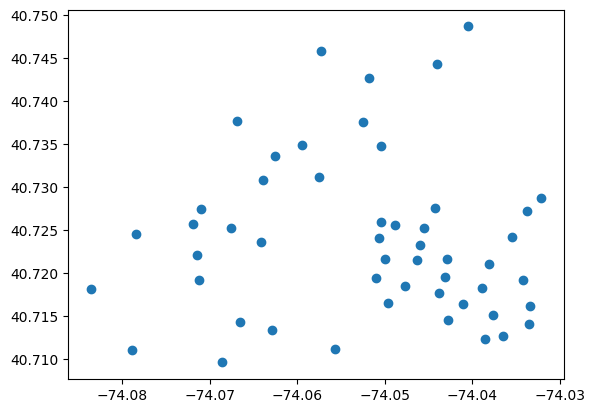

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[:, 1], data[:, 0])

In [ ]:
import folium

colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]

map = folium.Map(location=[data[:, 0].mean(), data[:, 1].mean()], zoom_start=12)
map1 = folium.Map(location=[data[:, 0].mean(), data[:, 1].mean()], zoom_start=12)
for i in range(data.shape[0]):
    folium.CircleMarker(
        location=[data[i, 0], data[i, 1]],
        radius=8, # <-sizes
        weight=2,
        fill=True,
        color=colors[16] # <- colour
    ).add_to(map)
map

#**The task:**
1. Find optimal number of bikine's repare stations by clustering stations coordinates. For that tarsk use KMeans clustering method and find in your opinion two "optimal" numbers of clusters in range [2 to 36].

1.1 For the report plot in colour clustered data and the centroids.

1.2 Calculate the data percentage in a cluster and show in pie diagram.

1.3 Show the report for two "optimal/nice" numbers of clusters in range [2 to 36]




In [ ]:
from sklearn.cluster import KMeans

#number of clusters
k = 3


In [ ]:
kmeans_cluster = KMeans(n_clusters=k, random_state=3524)
kmeans_cluster.fit(data)

KMeans(n_clusters=3, random_state=3524)

In [ ]:
#show labels of the data
labels=kmeans_cluster.labels_
print(labels)

[1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 0 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Show the centroids of clusters
centroids = kmeans_cluster.cluster_centers_
centroids

array([[ 40.72002628, -74.04256798],
       [ 40.71959015, -74.07138077],
       [ 40.73840175, -74.05516605]])

Calculate and show in pie diagram the data percentage in a clusters

[0.5490196078431373, 0.23529411764705882, 0.21568627450980393]


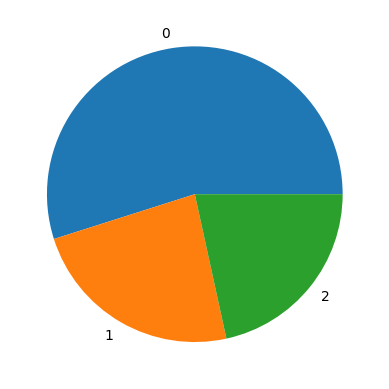

In [ ]:
k_labels=list(labels)
percent=[]
for i in range(len(centroids)):
  j=k_labels.count(i)
  j=j/(len(k_labels))
  percent.append(j)

print(percent)
plt.pie(percent,labels=np.arange(len(centroids)))
plt.show()

Colour station location according to cluster number

In [ ]:
# add cluster label (clour) for a data location
for i in range(len(k_labels)):
    folium.CircleMarker(
        location=[data[i, 0], data[i, 1]],
        radius=8,
        weight=2,
        fill=True,
        color=colors[k_labels[i]] # <- colour
    ).add_to(map)


In [ ]:
# add markers for a centroids in black colour
for i in range(len(centroids)):
    folium.CircleMarker(
        location=[centroids[i, 0], centroids[i, 1]],
        radius=8,
        weight=5,
        fill=True,
        fill_color='black',
        color='black'
    ).add_to(map)
map

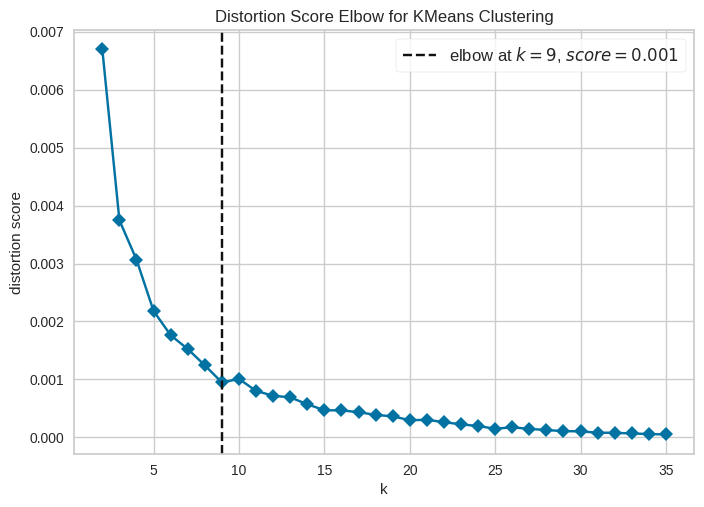

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,36), metric='distortion', timings=False)
#metric='calinski_harabasz'
#metric='silhouette'
#metric='distortion'
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show(timings=False)        # Finalize and render the figure

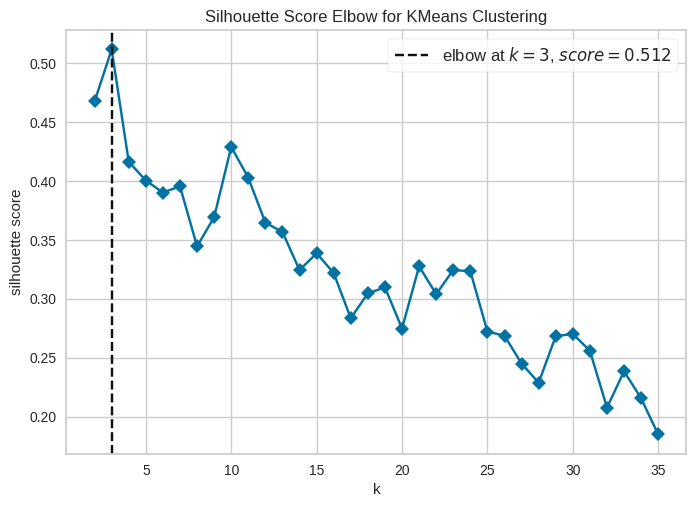

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,36), metric='silhouette', timings=False)
#metric='calinski_harabasz'
#metric='silhouette'
#metric='distortion'
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show(timings=False)        # Finalize and render the figure

In [ ]:
#number of clusters
k = 9


In [ ]:
kmeans_cluster = KMeans(n_clusters=k, random_state=3524)
kmeans_cluster.fit(data)

KMeans(n_clusters=9, random_state=3524)

In [ ]:
#show labels of the data
labels=kmeans_cluster.labels_
print(labels)

[1 8 1 4 4 1 4 1 4 4 4 4 2 2 8 4 2 4 5 2 2 4 2 2 2 5 2 5 2 0 5 2 5 2 5 2 0
 5 2 0 3 3 3 6 3 6 3 6 7 6 7]


In [ ]:
# Show the centroids of clusters
centroids = kmeans_cluster.cluster_centers_
centroids

array([[ 40.72675413, -74.03378323],
       [ 40.71217883, -74.06344297],
       [ 40.72204741, -74.04714862],
       [ 40.7336816 , -74.06208206],
       [ 40.71605675, -74.03747717],
       [ 40.72403822, -74.07085132],
       [ 40.74024416, -74.05299551],
       [ 40.74651732, -74.0422171 ],
       [ 40.71467065, -74.0812697 ]])

[0.058823529411764705, 0.0784313725490196, 0.27450980392156865, 0.09803921568627451, 0.19607843137254902, 0.13725490196078433, 0.0784313725490196, 0.0392156862745098, 0.0392156862745098]


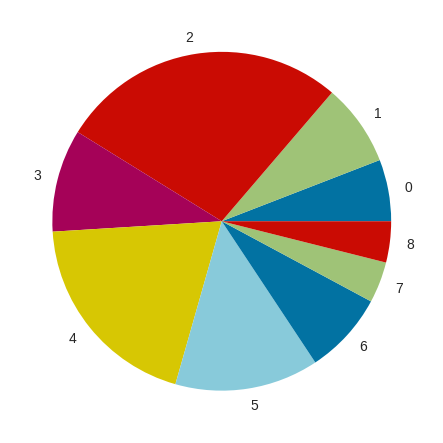

In [ ]:
k_labels=list(labels)
percent=[]
for i in range(len(centroids)):

  j=k_labels.count(i)
  j=j/(len(k_labels))
  percent.append(j)
print(percent)
plt.pie(percent,labels=np.arange(len(centroids)))
plt.show()

In [ ]:
# add cluster label (clour) for a data location
for i in range(len(k_labels)):
    folium.CircleMarker(
        location=[data[i, 0], data[i, 1]],
        radius=8,
        weight=2,
        fill=True,
        color=colors[k_labels[i]] # <- colour
    ).add_to(map1)

In [ ]:
# add markers for a centroids in black colour
for i in range(len(centroids)):
    folium.CircleMarker(
        location=[centroids[i, 0], centroids[i, 1]],
        radius=8,
        weight=5,
        fill=True,
        fill_color='black',
        color='black'
    ).add_to(map1)
map1

Do any conclusion:
### The selection of 3 clusters provides a broader segmentation, suitable for large geographic zones with minimal overlap, making it ideal for simpler implementation and resource allocation. In contrast, 9 clusters offer finer granularity, enabling more localized optimization, which can improve service efficiency in densely populated areas. The elbow method and silhouette scores justify both choices, with 3 clusters emphasizing simplicity and 9 clusters prioritizing precision. Both options appear effective depending on operational goals, with 3 clusters favoring ease of management and 9 clusters catering to higher demand variability.